In [6]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
# Prepare the dataset for analysis
# Read in csv file
file_path = "Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv"
inital_df = pd.read_csv(file_path)

# Drop the unwanted columns.
inital_df = inital_df.drop(columns=['Data As Of', 'Start Date', 'End Date', 'ICD10_codes', 'Number of Mentions', 'Flag'])

# Only keep the rows where the Group is "By Month", and delete the row where Age Group is "All Ages"
inital_df = inital_df.loc[inital_df['Group'] == 'By Month']
clean_df = inital_df.loc[inital_df['Age Group'] != 'All Ages']

# Drop the NaN values
clean_df = clean_df.dropna()

# Convert Year and Month columns to integers
clean_df.loc[:, 'Year'] = clean_df['Year'].astype(int)
clean_df.loc[:, 'Month'] = clean_df['Month'].astype(int)
clean_df.loc[:, 'COVID-19 Deaths'] = clean_df['COVID-19 Deaths'].astype(int)

clean_df.head()

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
62100,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62101,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62102,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9
62103,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27
62104,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,19


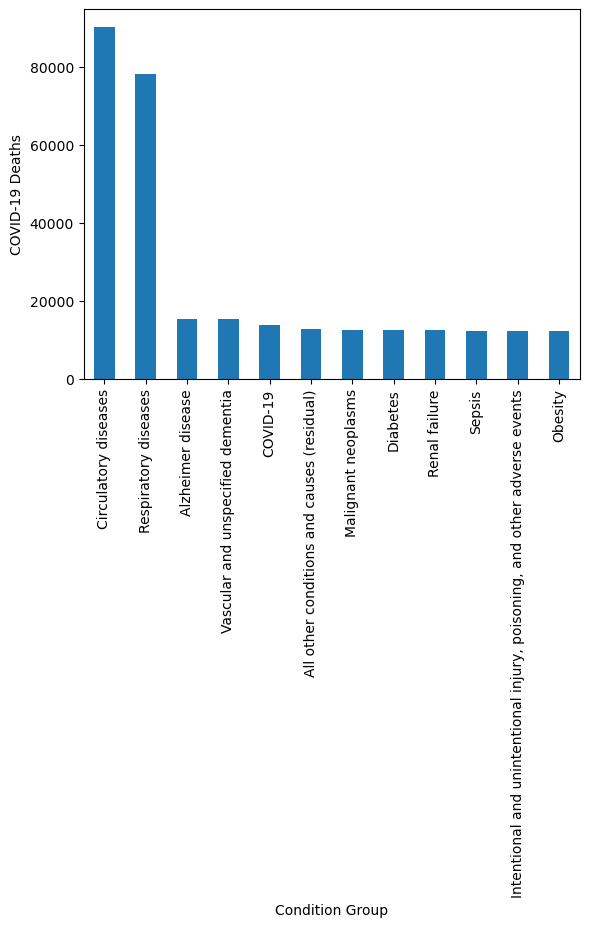

In [10]:
#Number of deaths by Condition group in the US

total_quant_death = clean_df.groupby('Condition Group')['COVID-19 Deaths'].count()
total_quant_death = total_quant_death.sort_values(ascending=False)
total_quant_death.plot(kind='bar')
plt.xlabel('Condition Group')
plt.ylabel('COVID-19 Deaths')
plt.show()


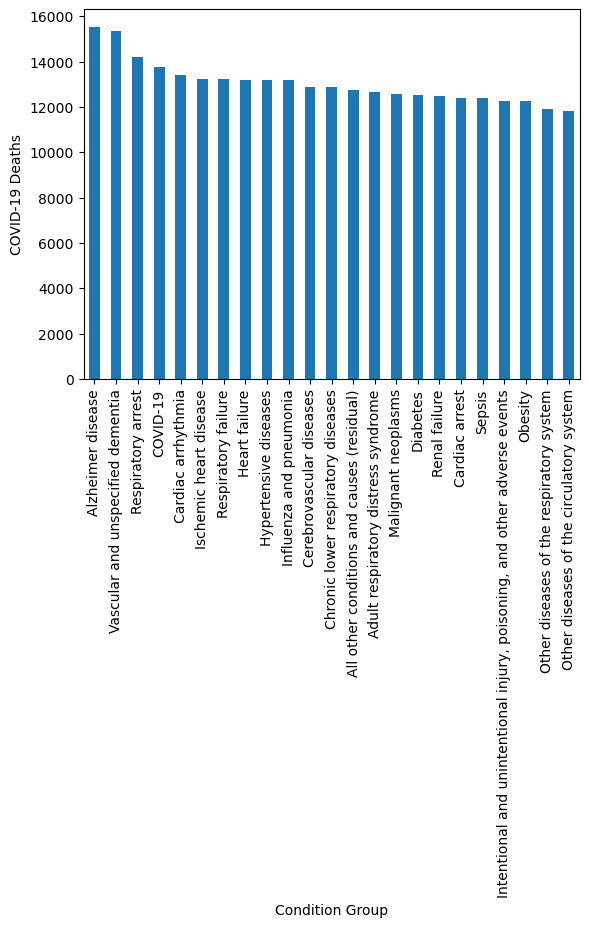

In [11]:
#Number of deaths by individual condition in the US
total_quant_death = clean_df.groupby('Condition')['COVID-19 Deaths'].count()
total_quant_death = total_quant_death.sort_values(ascending=False)
total_quant_death.plot(kind='bar')
plt.xlabel('Condition Group')
plt.ylabel('COVID-19 Deaths')
plt.show()

In [14]:
#state prework
state_quant_death = clean_df.groupby(['State','Condition'])['COVID-19 Deaths'].count()
print (state_quant_death)

State    Condition                                 
Alabama  Adult respiratory distress syndrome           201
         All other conditions and causes (residual)    240
         Alzheimer disease                             264
         COVID-19                                      266
         Cardiac arrest                                210
                                                      ... 
Wyoming  Renal failure                                 273
         Respiratory arrest                            339
         Respiratory failure                           240
         Sepsis                                        289
         Vascular and unspecified dementia             299
Name: COVID-19 Deaths, Length: 1242, dtype: int64
